# Support Vector Machines Project 

### Import Libraries and Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
sns.set()

### EDA

**Create a pairplot. Determine which flower species seems to be the most separable from the viz**

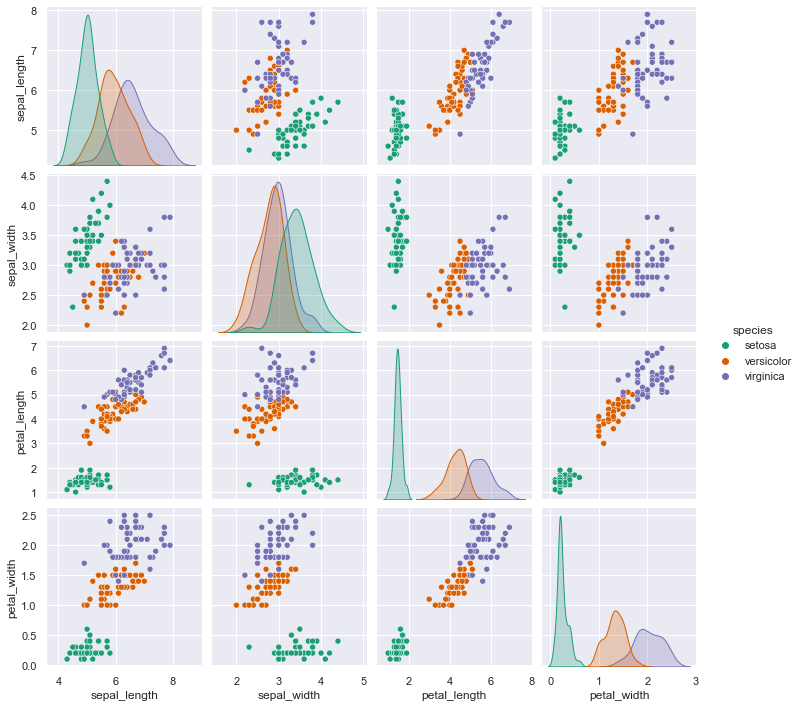

In [3]:
sns.pairplot(iris,hue='species',palette='Dark2')

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

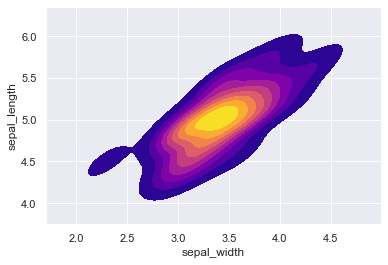

In [4]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(x = setosa['sepal_width'], y = setosa['sepal_length'], cmap="plasma", shade=True)

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Train a SVC Model

In [7]:
from sklearn.svm import SVC

In [8]:
svc_model = SVC()

In [9]:
svc_model.fit(X_train,y_train)

SVC()

### Model Evaluation

**Create a confusion matrix and a classification report**

In [10]:
predictions = svc_model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 17  2]
 [ 0  0 13]]


In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94        19
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

### Gridsearch Practice

**Import GridsearchCV**

In [14]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma**

In [15]:
param_grid = {'C': [0.01,0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]}

**Create a GridSearchCV object and fit it to the training data**

In [16]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [17]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.01, gamma=0.01, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

**View best parameters found by GridSearchCV, and best estimator**

In [18]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [19]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

**New Model Evaluation**

In [20]:
best_param_pred = grid.predict(X_test)

In [21]:
print(confusion_matrix(y_test,best_param_pred))

[[13  0  0]
 [ 0 17  2]
 [ 0  0 13]]


In [22]:
print(classification_report(y_test,best_param_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94        19
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

